## 데이터 불러오기

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

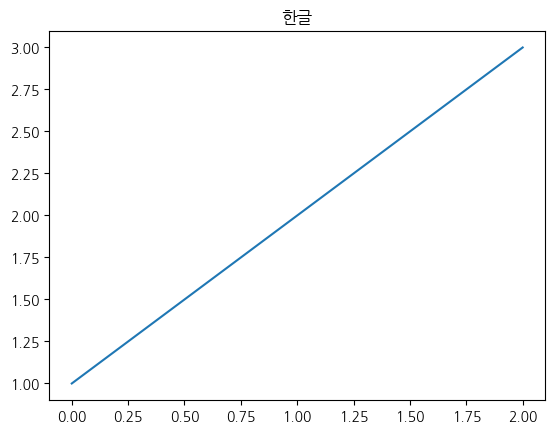

In [93]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data_path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/bike-sharing-demand/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [96]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [97]:
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [98]:
submission.head()


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## 문제 정의
- 각 시간대별로 자전거 대여 수량을 예측 하세요

## 데이터 필드
- datetime : 1시간 간격 데이터 수집
- season
  - 1:봄, 2:여름, 3:가을, 4:겨울
- holiday
  - 0:공휴일 아님, 1:공휴일
- workingday
  - 0:평일이 아님, 1:평일
- weather
  - 1:맑음, 2:약간흐림, 3:약한 강우, 4:강한 강우
- temp : 섭씨온도
- atemp : 체감섭씨온도
- humidity : 상대습도
- windspeed : 풍속
- casual : 비회원수
- registered : 회원수
- count(종속변수) : 자전거 대여 수량

## 날짜 데이터 변환

In [99]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [100]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['time'] = train['datetime'].apply(lambda x: x.split()[1])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [101]:
train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])
train['hour'] = train['time'].apply(lambda x: x.split(':')[0])
train['minute'] = train['time'].apply(lambda x: x.split(':')[1])
train['second'] = train['time'].apply(lambda x: x.split(':')[2])

In [102]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,2011,01,01,04,00,00


In [103]:
test['date'] = test['datetime'].apply(lambda x: x.split()[0])
test['time'] = test['datetime'].apply(lambda x: x.split()[1])

test['year'] = test['date'].apply(lambda x: x.split('-')[0])
test['month'] = test['date'].apply(lambda x: x.split('-')[1])
test['day'] = test['date'].apply(lambda x: x.split('-')[2])
test['hour'] = test['time'].apply(lambda x: x.split(':')[0])
test['minute'] = test['time'].apply(lambda x: x.split(':')[1])
test['second'] = test['time'].apply(lambda x: x.split(':')[2])

## 요일 반환

In [122]:
from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(lambda x: calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,time,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,...,16,2011-01-01,00:00:00,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,...,40,2011-01-01,01:00:00,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,...,32,2011-01-01,02:00:00,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,3,...,13,2011-01-01,03:00:00,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,0,...,1,2011-01-01,04:00:00,2011,01,01,04,00,00,Saturday


In [106]:
# season
train['season'] = train['season'].map({1: '봄', 2: '여름', 3: '가을', 4: '겨울'})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,time,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,1,9.84,14.395,81,0.0,3,...,16,2011-01-01,00:00:00,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,1,9.02,13.635,80,0.0,8,...,40,2011-01-01,01:00:00,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,1,9.02,13.635,80,0.0,5,...,32,2011-01-01,02:00:00,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,1,9.84,14.395,75,0.0,3,...,13,2011-01-01,03:00:00,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,1,9.84,14.395,75,0.0,0,...,1,2011-01-01,04:00:00,2011,01,01,04,00,00,Saturday


In [107]:
# weather
train['weather'] = train['weather'].map({1: '맑음', 2: '약간흐림', 3: '약한강우', 4: '강한강우'})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,time,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,...,16,2011-01-01,00:00:00,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,...,40,2011-01-01,01:00:00,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,...,32,2011-01-01,02:00:00,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,3,...,13,2011-01-01,03:00:00,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,0,...,1,2011-01-01,04:00:00,2011,01,01,04,00,00,Saturday


## 탐색적 데이터 분석 <==> Feature Engineering(피처 엔지니어링)
- 머신러닝을 진행할 때 왜 하냐?
- 머신러닝
  - 예측을 하기 위한 방법론
- 최신 알고리즘이 있으니까, 그거 쓰면 다 되는 거 아니에요? 되긴 하지만 알고리즘에 그 input변수를 왜 선정했는지 알아야 한다.
- 피처 엔지니어링 -> 머신러닝 알고리즘에 적용할 독립변수를 찾아서 넣어주는 것
  - 미래 예측을 할 때, 필요한 독립변수는 최소 1개 y = ax + b
  - 독립변수 x 컬럼이 정말로 y 변수에 중요한 영향을 끼치는 변수일까?
  - 그러한 컬럼들을 찾고, 적절하게 전처리를 하는 것(종속변수에 영향을 주냐 안주냐)
- 알고리즘에 넣을 피처(독립변수)를 왜 뽑았는지 반드시 설명할 수 있어야 한다. 뽑는 과정은 아래와 같은데, 그러므로 이유를 설명할 때 도메인지식과 시각화, 통계적 방법론을 같이 곁들여 설명해야 한다.
  - 탐색적 데이터 분석에서 도메인을 갖춘 사람이 시각화나 통계적 방법론을 통해서 독립변수를 추린다.
  - 그 독립변수의 기울기를 찾는 것이 머신러닝이다.
  - 정형데이터 컬럼이 존재하고, 그걸 추리는 건 사람이 한다 --> 머신러닝
  - 비정형데이터 이미지, 영상 그걸 추리는 걸 알고리즘이 한다 --> 딥러닝

## 시각화 코드 작성
- count = a * x1 + b * x2 + c * x3....
- 종속변수(=반응변수)가 제일 중요한 변수
- 시각화를 그린다. -> count는 고정값(수요예측이므로)
  - count 수치데이터를 기반으로 한 시각화의 종류 파악
  - 히스토그램 : count
  - 산점도 : x = 수치형변수, y = count
  - 히트맵 : 수치형 vs 수치형
  - 막대그래프, 박스플롯, 선 그래프 : x = 범주, 날짜, y = count

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### 종속변수 로그변환
- 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
- 예측을 하면, 로그변환된 값을 예측하는 것이므로
- 그 값을 다시 지수변환 해서 최종예측

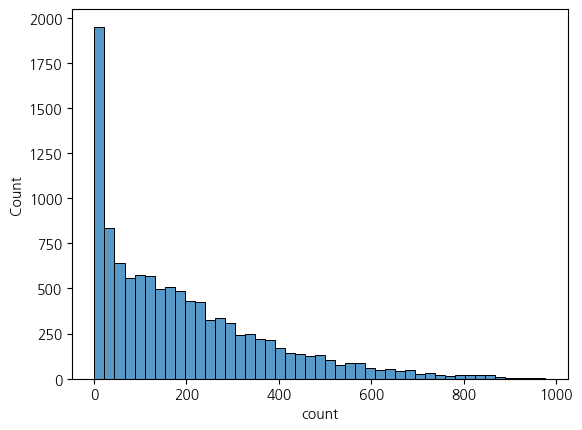

In [109]:
fig, ax = plt.subplots()
sns.histplot(train['count'])

plt.show()

<Axes: xlabel='count', ylabel='Count'>

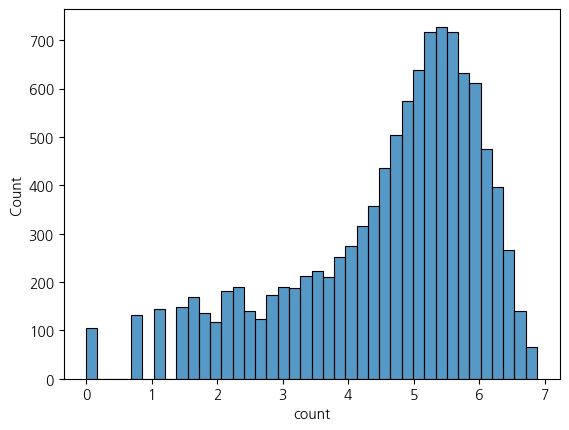

In [110]:
# 로그변환
sns.histplot(np.log(train['count']))

### 막대그래프
- 막대그래프에서 굳이 필요없는 피처를 찾는다면
- 예측은 종속변수에 영향이 큰 독립변수 위주로

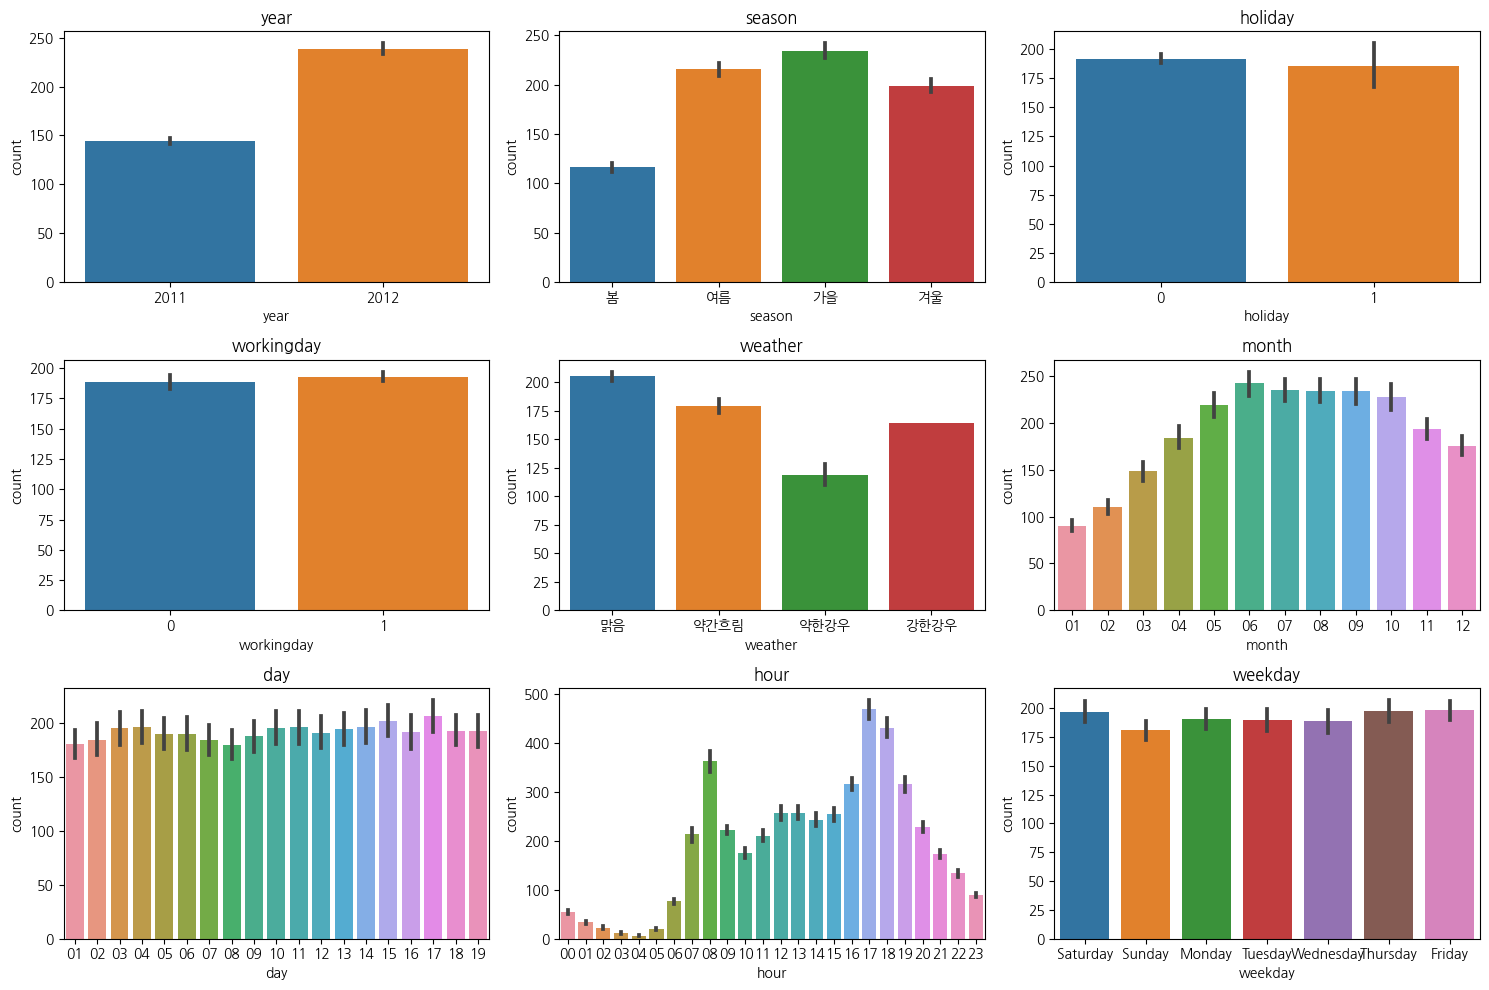

In [123]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.barplot(train, x = 'year', y = 'count', ax = ax[0, 0])
sns.barplot(train, x = 'season', y = 'count', ax = ax[0, 1])
sns.barplot(train, x = 'holiday', y = 'count', ax = ax[0, 2])
sns.barplot(train, x = 'workingday', y = 'count', ax = ax[1, 0])
sns.barplot(train, x = 'weather', y = 'count', ax = ax[1, 1])
sns.barplot(train, x = 'month', y = 'count', ax = ax[1, 2])
sns.barplot(train, x = 'day', y = 'count', ax = ax[2, 0])
sns.barplot(train, x = 'hour', y = 'count', ax = ax[2, 1])
sns.barplot(train, x = 'weekday', y = 'count', ax = ax[2, 2])


ax[0, 0].set_title('year')
ax[0, 1].set_title('season')
ax[0, 2].set_title('holiday')
ax[1, 0].set_title('workingday')
ax[1, 1].set_title('weather')
ax[1, 2].set_title('month')
ax[2, 0].set_title('day')
ax[2, 1].set_title('hour')
ax[2, 2].set_title('weekday')
plt.tight_layout()
plt.show()

- day 컬럼은 제외!! 이유 train은 1부터 19, test는 20부터 31
  - 참조할만한 날짜가 훈련데이터에 존재하지 않음

In [112]:
train['day'].value_counts()

01    575
09    575
17    575
05    575
16    574
15    574
14    574
13    574
19    574
08    574
07    574
04    574
02    573
12    573
03    573
06    572
10    572
11    568
18    563
Name: day, dtype: int64

In [125]:
test['datetime'].value_counts()

20    574
21    574
23    573
24    573
25    572
22    569
26    567
28    563
27    552
29    526
30    514
31    336
Name: day, dtype: int64

- second, minute도 제거
  - 정보가 없음

### boxplot
- season, weather, weekday, holiday
- 2x2 배열

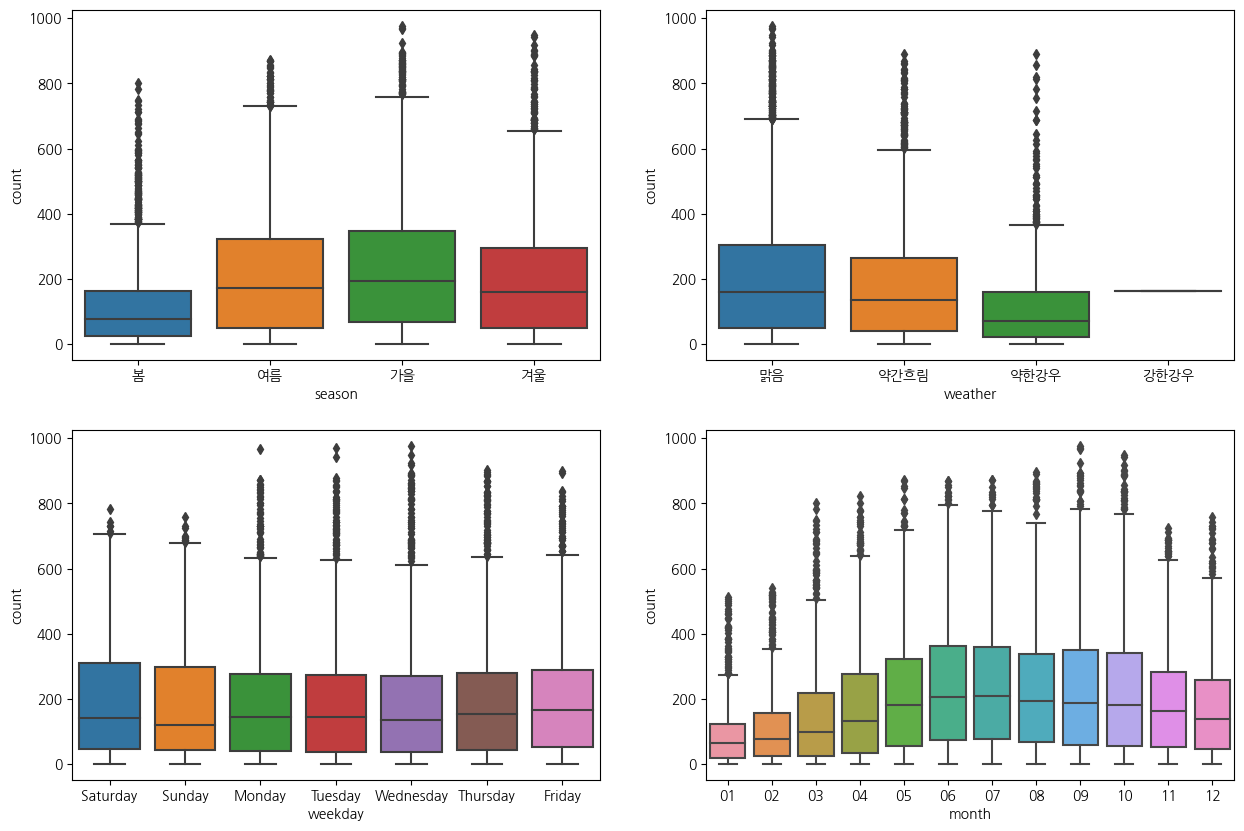

In [126]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data = train, x = 'season', y = 'count', ax = ax[0,0])
sns.boxplot(data = train, x = 'weather', y = 'count', ax = ax[0,1])
sns.boxplot(data = train, x = 'weekday', y = 'count', ax = ax[1,0])
sns.boxplot(data = train, x = 'month', y = 'count', ax = ax[1,1])

plt.show()

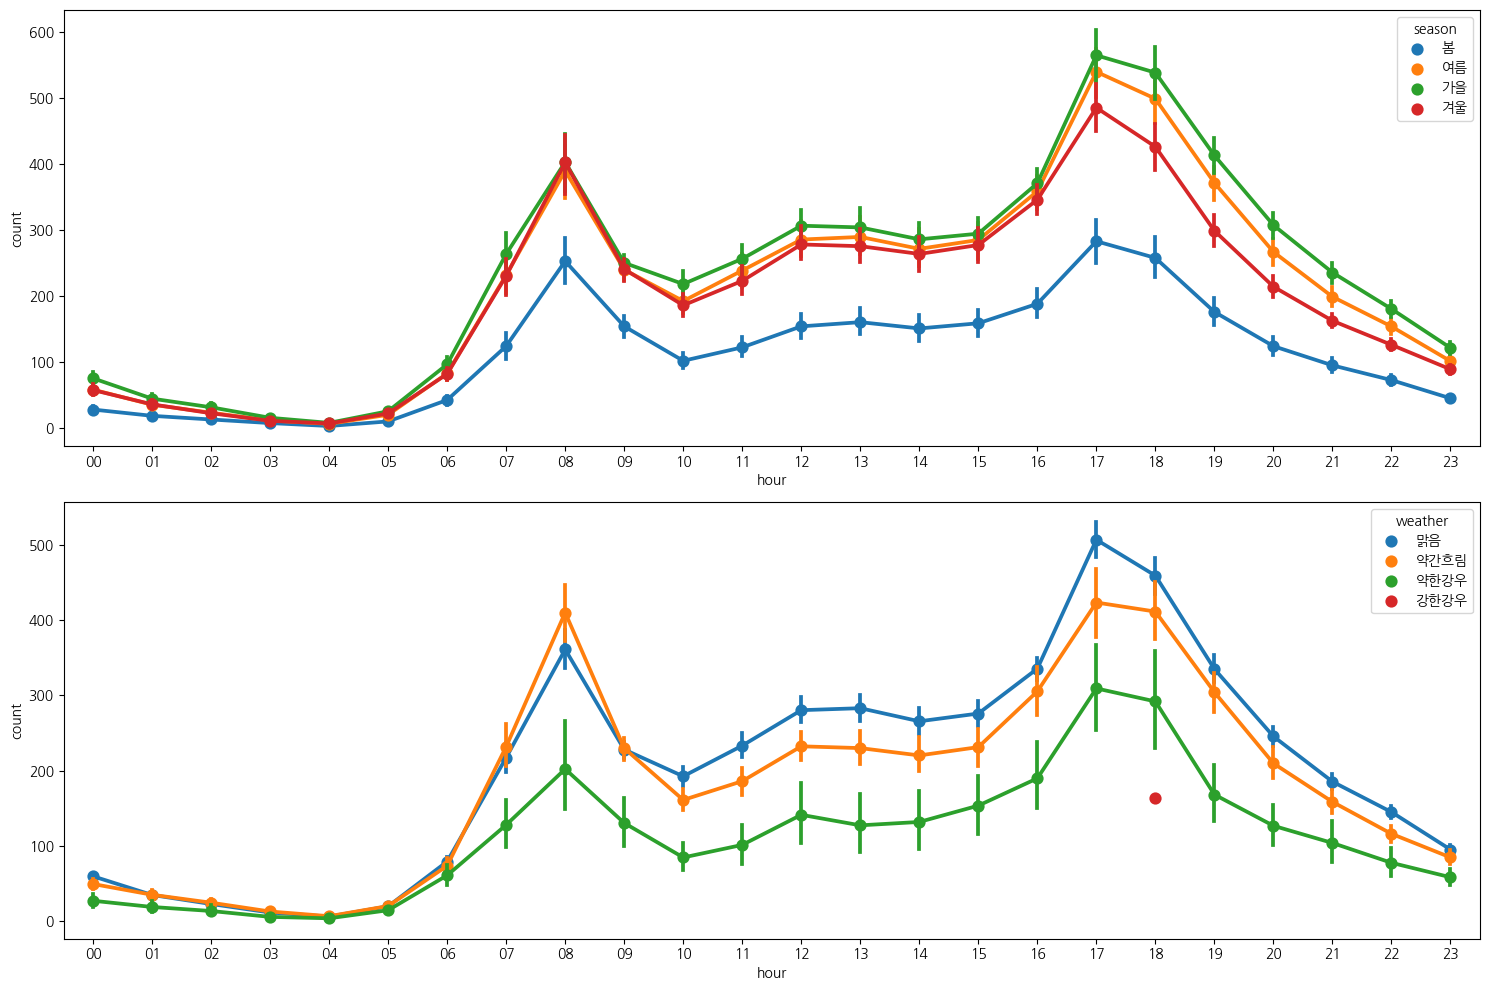

In [115]:
fig, ax = plt.subplots(2, figsize=(15, 10))

# 계절, 날씨
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax[0])
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax[1])

plt.tight_layout()
plt.show()

In [116]:
train['weather'].value_counts()

맑음      7192
약간흐림    2834
약한강우     859
강한강우       1
Name: weather, dtype: int64

- 첫번째 : 시스템 이상? --> PM에게 보고 --> 개발자 수정
- 데이터 시각화로 저 이상치를 잡아냄
- 강한 강우가 포함된 행은 제거 Task

### 회귀식, 산점도
- regplot() 사용
- 2 x 2

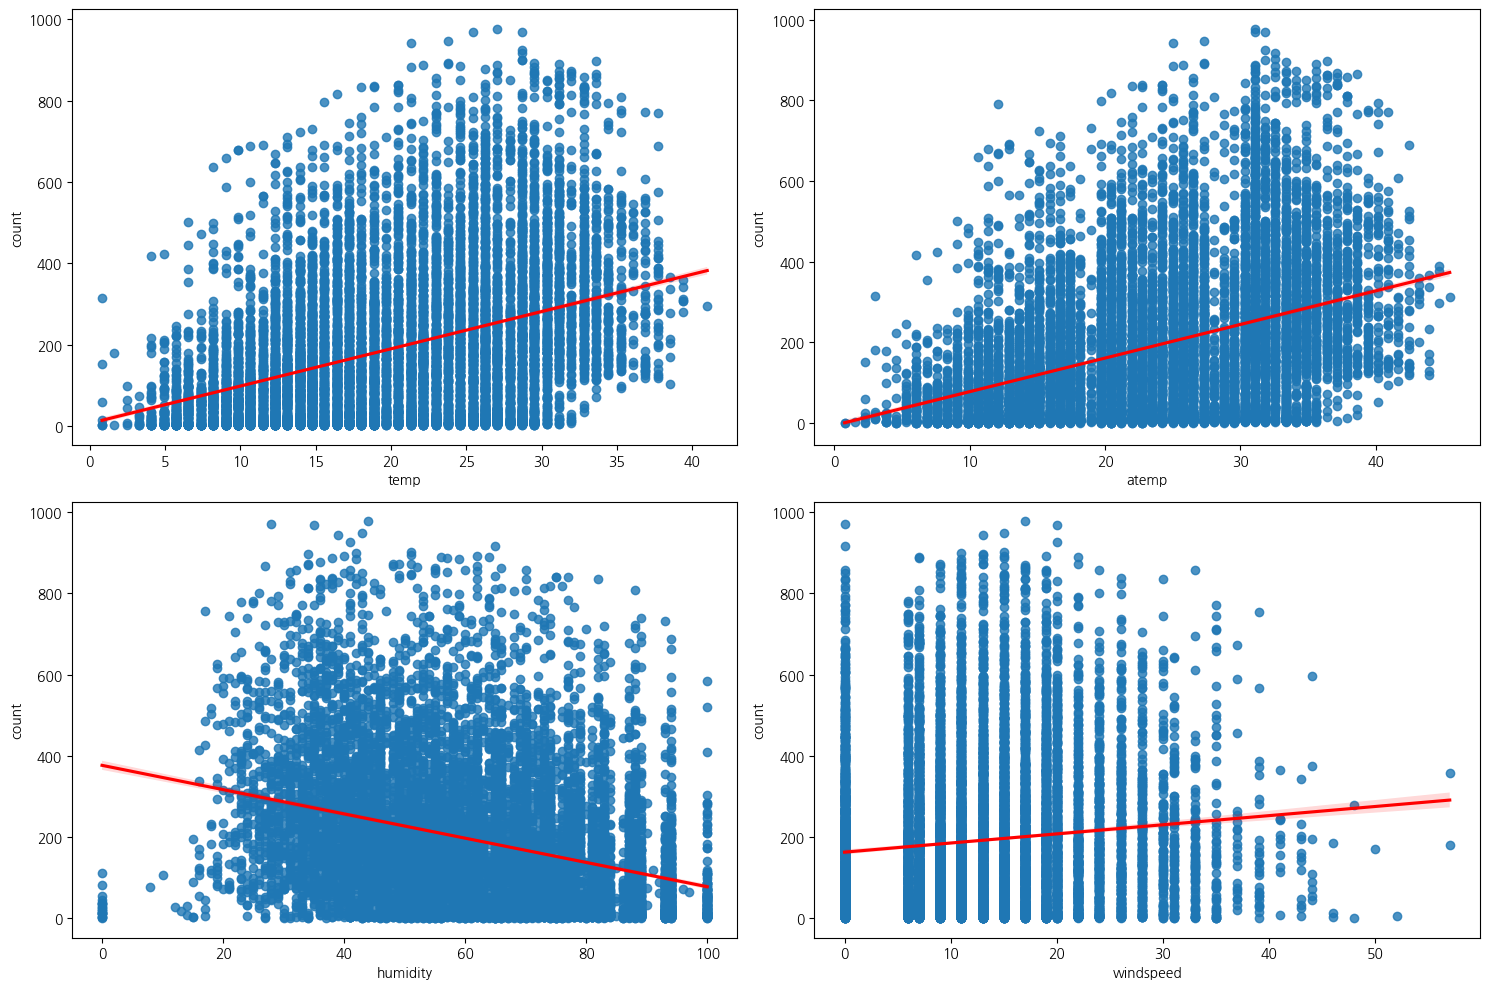

In [117]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.regplot(data = train, x = 'temp', y = 'count', line_kws = {'color' : 'red'}, ax = ax[0, 0])
sns.regplot(data = train, x = 'atemp', y = 'count', line_kws = {'color' : 'red'}, ax = ax[0, 1])
sns.regplot(data = train, x = 'humidity', y = 'count', line_kws = {'color' : 'red'}, ax = ax[1, 0])
sns.regplot(data = train, x = 'windspeed', y = 'count', line_kws = {'color' : 'red'}, ax = ax[1, 1])

plt.tight_layout()
plt.show()

- temp, humidity 컬럼만 쓰겠다.

### 최종적인 input 변수 선정
- 탐색적 데이터 분석이 끝난 데이터가 됨

In [118]:
# cols = ['', '', '']

# final_df = train.loc[train['weather'] == '강한강우', cols]

In [119]:
# fig, ax = plt.subplots(figsize=(7,7))
# sns.scatterplot(train, x = 'temp', y = 'count')

# plt.show()

In [120]:
# fig, ax = plt.subplots(figsize=(7,7))
# sns.heatmap(train[['count']], cmap='coolwarm', fmt='d')

# plt.show()